# ABOUT DATA

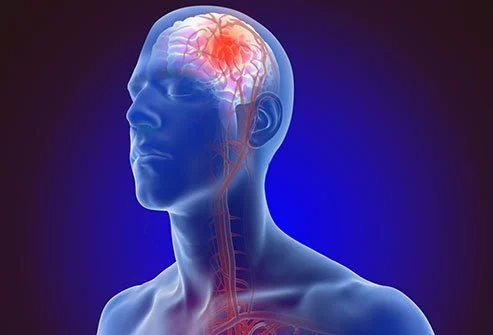

#### There are certain factors which influence the chances of getting a stroke. This dataset contains a person's information like gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status and we have to predict whether they will get a stroke or not.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [ ]:
stroke_df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

stroke_df.head()

# Dropping unnecessary columns

In [ ]:
#Drop the 'id' column as it is irrelevant in the prediction
stroke_df = stroke_df.drop('id', axis=1)
stroke_df.head()

# Missing Values

#### There are "Unknown" values in the smoking_status cloumn. We will treat them as missing values.

In [ ]:
stroke_df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
stroke_df.isna().sum()

# Filling missing values

In [ ]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(), inplace=True)
stroke_df['smoking_status'].fillna(stroke_df['smoking_status'].mode()[0], inplace = True)

stroke_df.isna().sum()

# Using LabelEncoder()

#### We will encode target labels with values between 0 and n_classes-1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [ ]:
for col in stroke_df.columns:
    stroke_df[str(col)] = label_encoded(stroke_df[str(col)])

In [ ]:
stroke_df

In [ ]:
#People who have not had a stroke
stroke_False = stroke_df[stroke_df['stroke'] == 0]

stroke_False.head()

In [ ]:
print('People who have not had a stroke in percentage-',len(stroke_False)/len(stroke_df)*100,'%')

In [ ]:
#People who have had a stroke
stroke_True = stroke_df[stroke_df['stroke'] == 1]

stroke_True.head()

In [ ]:
print('People who have had a stroke in percentage-',len(stroke_True)/len(stroke_df)*100,'%')

In [ ]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(stroke_df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [ ]:
#VISUALIZE
sns.pairplot(stroke_df, hue = 'stroke', vars=[
'gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke'])

# TESTING AND TRAINING DATA

In [ ]:
stroke_df

In [ ]:
#Drop the target label i.e. the stroke column
X = stroke_df.drop(['stroke'],axis =1)

X

In [ ]:
#output target class
y = stroke_df['stroke']

y

In [ ]:
#Now we need to split trained data and split data i.e. divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# TRAINING DATA using DecisionTreeClassifier

In [ ]:
#3577 sample data points for training
X_train.shape
y_train.shape

In [ ]:
#1533 samples for testing
X_test.shape
y_test.shape

In [ ]:
#Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()   #Instantiate an object out of our class
decision_tree.fit(X_train,y_train)

# EVALUATING MODEL

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Plot the confusion matrix for the testing data
y_predict_test = decision_tree.predict(X_test)

y_predict_test

In [ ]:
y_test

In [ ]:
cm = confusion_matrix(y_test, y_predict_test)

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

In [ ]:
print(classification_report(y_test, y_predict_test))

# TRAINING MODEL using RandomForestClassifier

In [ ]:
#Random forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 150)
RandomForest.fit(X_train, y_train)

In [ ]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

In [ ]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

In [ ]:
print(classification_report(y_test, y_predict_test))

### **The accuracy improved from 91% to 95% when RandomForestClassifier was used instead of DecisionTreeClassifier and thus, the accuracy score of RandomForestClassifier is better than that of DecisionTreeClassifier.**